In [1]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
import emoji
import string

import nltk
#nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#path = "/Users/miklp/Documents/GitHub/Student-Projects/datasets_483_982_spam.csv"
path = "/Users/macia/Documents/MSIA-21/IRL-MSIA/datasets_483_982_spam.csv"

#path_1 = "https://raw.githubusercontent.com/mowgl-i/Student-Projects/master/datasets_483_982_spam.csv"
with open(path) as file:
    data = pd.read_csv(file)
    
data.columns = ["class","text", "none","none","none"]

data = data[["class","text"]]

print(data.head())

print("----------")
print("Data Shape:",data.shape)

print("----------")
print("Number of Missing data:",data.isnull().sum())

print("----------")
print(round(747/5572 * 100), "%  of our data is classified as spam",data.groupby("class").count())
#data = pd.read_csv(path_1) 

  class                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
----------
Data Shape: (5572, 2)
----------
Number of Missing data: class    0
text     0
dtype: int64
----------
13 %  of our data is classified as spam        text
class      
ham    4825
spam    747


# Data preprocess


In [3]:
def clean_text(text):
    no_p = "".join([t for t in text if t  not in string.punctuation]) 
    tokenizer = RegexpTokenizer(r'\w+')
    tokens =  tokenizer.tokenize(no_p.lower())
    no_s = [t for t in tokens if t not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    no_num = [t for t in no_s if t.isalpha()]
    ready_text = [lemmatizer.lemmatize(i) for i in no_num]
    return ready_text
data['ready_text'] = data['text'].apply(lambda x: clean_text(x))

ready_text_2 = data['text'].apply(lambda x: clean_text(x))


### let's use a smaller dataset for now.

In [87]:
ready_text_3 = ready_text_2[0:150]

In [88]:
model = Word2Vec(ready_text_3, min_count = 1, window = 4, workers = 2, size =  2, seed = 1, sg = 1)
print(model)

model.train(sentences = ready_text_3, total_examples = 3, epochs = 10)


Word2Vec(vocab=791, size=2, alpha=0.025)


(12509, 13970)

In [89]:
model.wv.most_similar(['crazy'])

[('jackpot', 0.9999182820320129),
 ('gentleman', 0.9998825788497925),
 ('respect', 0.9997646808624268),
 ('tt', 0.9994341135025024),
 ('nt', 0.9991725087165833),
 ('gave', 0.9991616010665894),
 ('begin', 0.9991481304168701),
 ('hows', 0.9989909529685974),
 ('guess', 0.9987490177154541),
 ('england', 0.9986999034881592)]

In [90]:
model.wv.most_similar('call')

[('vettam', 0.9999945759773254),
 ('tea', 0.9999750256538391),
 ('coin', 0.9999729990959167),
 ('ratetcs', 0.9999468326568604),
 ('factory', 0.9999148845672607),
 ('oh', 0.9997179508209229),
 ('usually', 0.9995535612106323),
 ('seeing', 0.9994727373123169),
 ('way', 0.999336302280426),
 ('thatåõs', 0.9992079138755798)]

In [91]:
model.wv.most_similar(['xxx'])

[('c', 0.9999966621398926),
 ('wonderful', 0.9999947547912598),
 ('invite', 0.9999597072601318),
 ('urgnt', 0.9999493360519409),
 ('plural', 0.9999164342880249),
 ('lunch', 0.999891996383667),
 ('day', 0.9998806715011597),
 ('life', 0.9998648166656494),
 ('eatin', 0.9997847676277161),
 ('must', 0.9996449947357178)]

# Network Graph

In [92]:
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

t_vect = TfidfVectorizer(
    tokenizer = lambda x: x,
    preprocessor = lambda x: x)

%matplotlib inline

t_vect_vectors = t_vect.fit_transform(ready_text_3)


model[model.wv.vocab][:5]

C:\Users\macia\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


array([[-0.05656072,  0.06512983],
       [-0.09231795,  0.19547258],
       [-0.2335932 , -0.17690916],
       [ 0.21799968, -0.0202068 ],
       [ 0.15894186, -0.0270991 ]], dtype=float32)

In [93]:
token_counts = ready_text_3.apply(pd.Series).stack().value_counts()
token_counts.nlargest(10)

u       30
call    22
im      19
like    13
å       12
free    11
dont    10
go       9
ok       9
know     8
dtype: int64

In [94]:
len(t_vect.vocabulary_) == len(token_counts)

True

In [95]:
t_vect.idf_[0:15]

array([5.32413266, 5.32413266, 5.32413266, 5.32413266, 5.32413266,
       5.32413266, 5.32413266, 5.32413266, 4.91866755, 5.32413266,
       5.32413266, 4.91866755, 5.32413266, 5.32413266, 5.32413266])

In [96]:
pd.DataFrame(t_vect.idf_, index=t_vect.get_feature_names(),columns=["idf_weights"])

,idf_weights
abiola,5.324133
abt,5.324133
ac,5.324133
accomodate,5.324133
accomodations,5.324133
...,...
å,3.532373
ì,4.630985
ìll,5.324133
ìï,5.324133


In [97]:

from itertools import combinations

word_pairs = list(combinations(list(model.wv.vocab.keys()),2))

In [98]:
Edge_weight_test = []
for pair in word_pairs:
    edge_weight = model.wv.similarity(pair[0],pair[1])
    Edge_weight_test.append(edge_weight)
print(Edge_weight_test[0:10])
print(word_pairs[0:10])

[0.9627316, 0.06686568, -0.72257835, -0.7732624, 0.82102966, -0.059270233, -0.009454519, -0.15199554, 0.9316741, 0.21374422]
[('go', 'jurong'), ('go', 'point'), ('go', 'crazy'), ('go', 'available'), ('go', 'bugis'), ('go', 'n'), ('go', 'great'), ('go', 'world'), ('go', 'la'), ('go', 'e')]


In [173]:
test = []
for word_count in token_counts.items():
   test.append(word_count)
print(test[0:14])
print('total number of word counts:',len(list(test)))

[('u', 30), ('call', 22), ('im', 19), ('like', 13), ('å', 12), ('free', 11), ('dont', 10), ('go', 9), ('ok', 9), ('know', 8), ('claim', 8), ('ur', 8), ('get', 8), ('sorry', 8)]
total number of word counts: 791


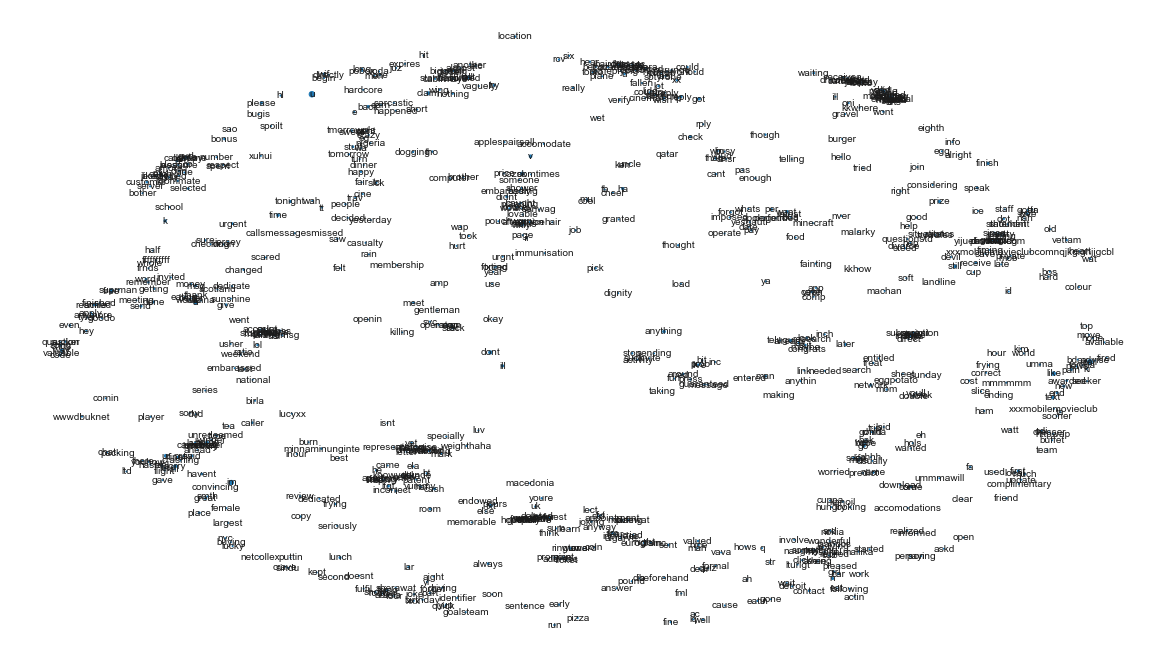

In [120]:
testgraph = nx.Graph()
node_sizes = []
for n in test:
    testgraph.add_node(n[0], node_size = n[1])
    node_sizes.append(n[1])

for pair in word_pairs:
    edge_weight = model.wv.similarity(pair[0],pair[1])
    if edge_weight > .90:
        testgraph.add_edge(pair[0],pair[1],weight = edge_weight)
    else:
        testgraph.add_edge(pair[0],pair[1])

plt.rcParams['figure.figsize'] = [16,9]
nx.draw(testgraph, edge_color = 'white', font_size = 10, with_labels = True, node_size = node_sizes)



In [174]:
#node_sizes

In [104]:
#!pip install --user nxviz
#from nxviz import CircosPlot
#nx.draw?

In [167]:
#nonontestgraph.nodes(data = True)
#testgraph.edges(data = True)

In [103]:
print(testgraph.number_of_nodes())
print(testgraph.number_of_edges())

791
32544


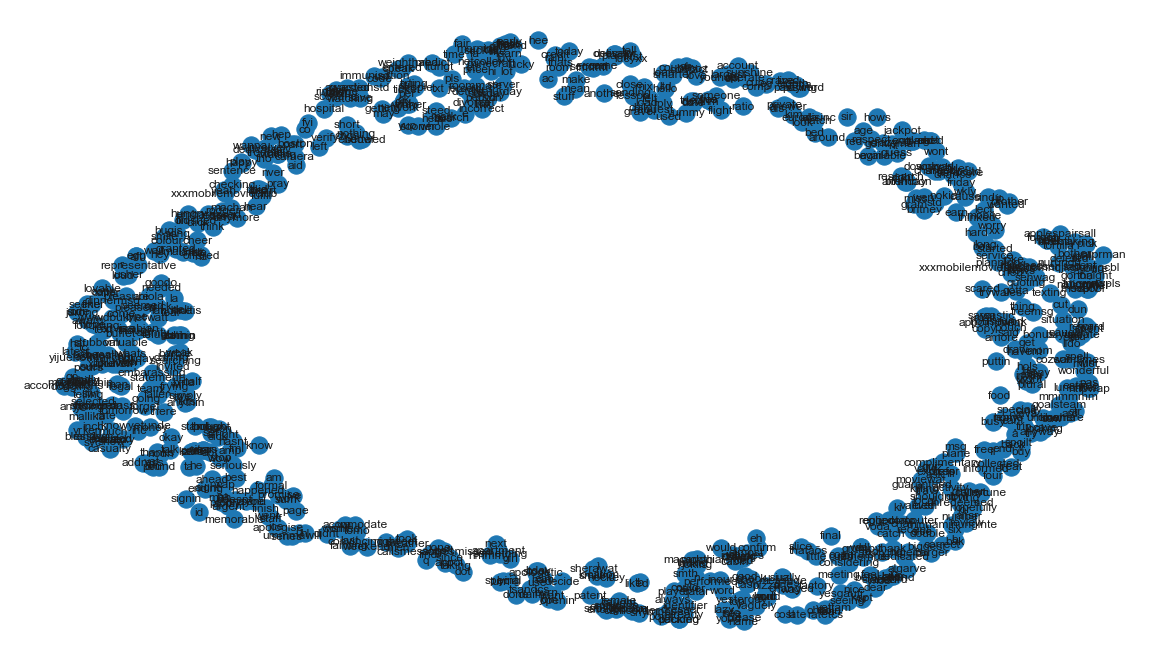

In [141]:
test_graph = nx.Graph()
for word_count in token_counts.items():
    test_graph.add_node(word_count[0] ,count = word_count[1])

for pair in word_pairs:
    edge_weight = model.wv.similarity(pair[0],pair[1])
    if edge_weight > .70:
        test_graph.add_edge(pair[0],pair[1],weight = edge_weight)

test_graph.remove_nodes_from(list(nx.isolates(test_graph)))        
nx.draw(test_graph,with_labels = True , edge_color = 'white')
plt.show()


In [201]:
#test_graph.node(50)

In [139]:
test_graph.number_of_nodes()

791

In [140]:
test_graph.number_of_edges()

312445

In [146]:
list(test_graph.nodes(data = True))
len(list(test_graph.neighbors('u')))

212

In [165]:
def nodes_with_m_neighb(test_graph,m):
    nodes = set()
    for n in test_graph.nodes():
        if len(list(test_graph.neighbors(n))) > m:
            nodes.add(n)
    return nodes

nodes_with_grthan_200 = nodes_with_m_neighb(test_graph,215)
print(nodes_with_grthan_200)


{'six', 'plane', 'local', 'unredeemed', 'ìï', 'befor', 'msg', 'back', 'nyc', 'activity', 'wif', 'lor', 'end', 'quiz', 'though', 'moviewat', 'shouldnt', 'trav', 'ahhh', 'ask', 'informed', 'dinner', 'complimentary', 'birla', 'telugu', 'callertune', 'half', 'treat', 'killing', 'eating', 'dont', 'ìll', 'dignity', 'trying', 'collected', 'valid', 'man', 'expires', 'guaranteed', 'even', 'free', 'team', 'hopefully', 'comin', 'amp', 'four'}


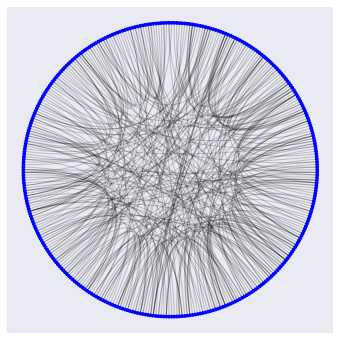

In [196]:
# You can ignore this i was just testing this out

# import nxviz
# from nxviz import CircosPlot
# circle = CircosPlot(test_graph)

# circle.draw()
# plt.show()